<a href="https://colab.research.google.com/github/shritigupta/EIP/blob/master/assign3/Assign3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D

from keras.layers import Activation, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

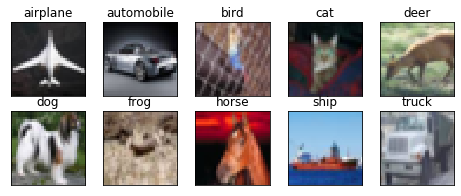

In [60]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [113]:
# Define the model
model = Sequential()
input = Input(shape=(32, 32, 3,))

#model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
#model.add(Activation('relu'))
#model.add(Convolution2D(48, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Convolution2D(96, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(96, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Convolution2D(192, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(192, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
l= SeparableConv2D(96, (3, 3),name='sep_conv_1')(input) # o/p 96 x 30x30 RF 3x3 
l = BatchNormalization(name='norm_1')(l)
l = Activation('relu')(l)

#l = MaxPooling2D(pool_size=(2, 2))(l)

l= SeparableConv2D(96, (3, 3),name='sep_conv_2')(l)# o/p 96 x 28x28 RF 5x5
l = BatchNormalization(name='norm_2')(l)
l = Activation('relu')(l)


l= SeparableConv2D(192, (3, 3),name='sep_conv_3')(l) # o/p 192x26x26 RF 7x7
l = BatchNormalization(name='norm_3')(l)
l = Activation('relu')(l)

l = MaxPooling2D(pool_size=(2, 2))(l) #o/p 192x13x13 RF 
l = Dropout(0.25)(l)

l= SeparableConv2D(96, (3, 3),name='sep_conv_6')(l)# o/p 96x11x11
l = BatchNormalization(name='norm_6')(l)
l = Activation('relu')(l)

l = Dropout(0.25)(l)

l= SeparableConv2D(100, (3, 3),name='sep_conv_4')(l)# o/p 100 x9x9
l = BatchNormalization(name='norm_4')(l)
l = Activation('relu')(l)

l= SeparableConv2D(100, (3, 3),name='sep_conv_5')(l)# o/p 100x7x7
l = BatchNormalization(name='norm_5')(l)
l = Activation('relu')(l)



#l = Dropout(0.25)(l)
#l= Flatten()(l)
#l = Dense(256)(l)
l = GlobalAveragePooling2D(name='avg_pool')(l)
#l = Dense(256)(l)
l = Dense(num_classes, activation='softmax')(l)

model = Model(inputs=[input], outputs=[l])

model.summary()


# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
sep_conv_1 (SeparableConv2D) (None, 30, 30, 96)        411       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 30, 30, 96)        384       
_________________________________________________________________
activation_175 (Activation)  (None, 30, 30, 96)        0         
_________________________________________________________________
sep_conv_2 (SeparableConv2D) (None, 28, 28, 96)        10176     
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 28, 28, 96)        384       
_________________________________________________________________
activation_176 (Activation)  (None, 28, 28, 96)        0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 69s 177ms/step - loss: 1.2969 - acc: 0.5330 - val_loss: 1.9364 - val_acc: 0.4483
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 58s 149ms/step - loss: 0.9254 - acc: 0.6726 - val_loss: 0.9537 - val_acc: 0.6591
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 58s 149ms/step - loss: 0.7947 - acc: 0.7209 - val_loss: 0.9189 - val_acc: 0.6842
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 58s 149ms/step - loss: 0.7154 - acc: 0.7486 - val_loss: 0.9009 - val_acc: 0.6917
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 58s 148ms/step - loss: 0.6608 - acc: 0

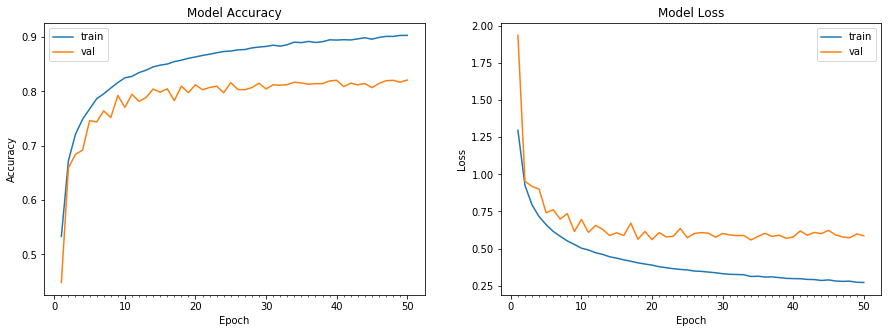

Accuracy on test data is: 82.08


In [114]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))